# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#Importing the necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset has 32560 rows and 15 columns

## Understanding the Dataset and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we can see from the above table, the dataset is a mixture of int64 datatype and object datatype.

Majority of the columns in the dataset are of object datatype, while columns Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week consist int64 dataset. 

In [4]:
#Checking for null values in the dataset 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset

## Visualizing the Dataset 

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

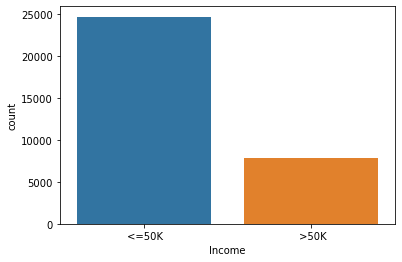

In [8]:
sb.countplot(x=df['Income'])
df["Income"].value_counts()

It is easy to observe that majority of the individuals in this dataset, about 75% of them, all make under 50k a year

<AxesSubplot:xlabel='Income', ylabel='count'>

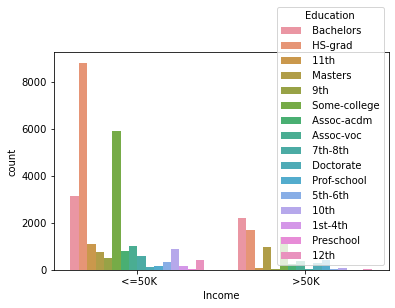

In [10]:
sb.countplot(x=df['Income'], hue = df['Education'], data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

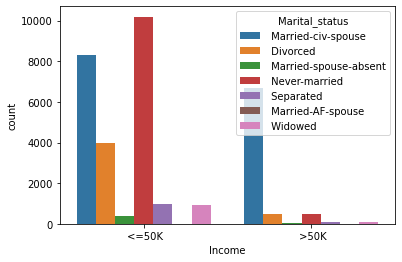

In [11]:
sb.countplot(x=df['Income'], hue = df['Marital_status'], data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

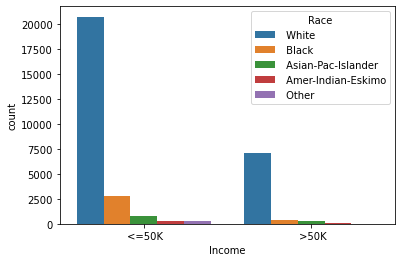

In [12]:
sb.countplot(x=df['Income'], hue = df['Race'], data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

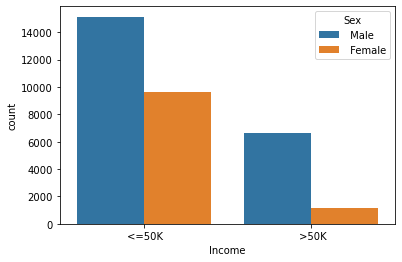

In [13]:
sb.countplot(x=df['Income'], hue = df['Sex'], data = df)

## Label Encoder 

Since most of the columns in this dataset consist of object datatype, it is better to convert them to numerics for better model prediction

In [14]:
#Label encoding object datatypes with Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [15]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


As we can see, the dataset has now been label encoded for better prediction

## Building a Predictive Model 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
X = df.drop("Income", axis = 1)
Y = df["Income"]

Since we are trying to decide whether the individuals are making over 50k or not, we should build a classification model.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## Support Vector Classifier 

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)

In [23]:
svc.score(X_train,Y_train)

0.7947086697086697

In [24]:
print(accuracy_score(Y_test,predsvc))

0.7923832923832924


In [25]:
print(confusion_matrix(Y_test,predsvc))

[[7389    2]
 [2026  351]]


In [26]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7391
           1       0.99      0.15      0.26      2377

    accuracy                           0.79      9768
   macro avg       0.89      0.57      0.57      9768
weighted avg       0.84      0.79      0.73      9768



In [27]:
scoresvc=cross_val_score(svc,X,Y,cv=5)
print(scoresvc)
print(scoresvc.mean())
print(scoresvc.std())

[0.79576167 0.79422604 0.79514742 0.79683661 0.79407248]
0.7952088452088452
0.0010213936823290028


## K-Neighbours Classifier 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knc = KNeighborsClassifier()
knc.fit(X_train,Y_train)
predknc=knc.predict(X_test)

In [30]:
knc.score(X_train,Y_train)

0.8345472095472095

In [31]:
print(accuracy_score(Y_test,predknc))

0.7791769041769042


In [32]:
print(confusion_matrix(Y_test,predknc))

[[6880  511]
 [1646  731]]


In [33]:
print(classification_report(Y_test,predknc))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      7391
           1       0.59      0.31      0.40      2377

    accuracy                           0.78      9768
   macro avg       0.70      0.62      0.63      9768
weighted avg       0.75      0.78      0.75      9768



In [34]:
scoreknc=cross_val_score(knc,X,Y,cv=5)
print(scoreknc)
print(scoreknc.mean())
print(scoreknc.std())

[0.77610565 0.77579853 0.77948403 0.7742629  0.77718059]
0.7765663390663391
0.001731925329222571


## Decision Tree Classifier 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [37]:
dtc.score(X_train,Y_train)

0.999956124956125

In [38]:
print(accuracy_score(Y_test,preddtc))

0.8079443079443079


In [39]:
print(confusion_matrix(Y_test,preddtc))

[[6442  949]
 [ 927 1450]]


In [40]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7391
           1       0.60      0.61      0.61      2377

    accuracy                           0.81      9768
   macro avg       0.74      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768



In [41]:
scoredtc=cross_val_score(dtc,X,Y,cv=5)
print(scoredtc)
print(scoredtc.mean())
print(scoredtc.std())

[0.80820025 0.80605037 0.80558968 0.81557125 0.80620393]
0.8083230958230958
0.0037330572571093235


## Random Forest Classifier 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [44]:
rfc.score(X_train,Y_train)

0.9999122499122499

In [45]:
print(accuracy_score(Y_test,predrfc))

0.854013104013104


In [46]:
print(confusion_matrix(Y_test,predrfc))

[[6857  534]
 [ 892 1485]]


In [47]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7391
           1       0.74      0.62      0.68      2377

    accuracy                           0.85      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.85      0.85      9768



In [48]:
scorerfc=cross_val_score(rfc,X,Y,cv=5)
print(scorerfc)
print(scorerfc.mean())
print(scorerfc.std())

[0.85503686 0.8519656  0.85795455 0.86378993 0.85626536]
0.857002457002457
0.003917984915617788


Let us try and decide which model is best for predicting the income of individuals over 50k.

As established before, only 7841 out of a total 32560 individuals made over 50k. 

To do this, we are going to find the model with the least difference between their score and cross validation score. 

1. Support Vector Classifier:
   0.7952088452088452 - 0.7947086697086697 = 0.0005001755001755

2. K-Neighbours Classifier:
   0.8345472095472095 - 0.7765663390663391 = 0.0579808704808704
   
3. Decision Tree Classifier:
   0.999956124956125 - 0.8083230958230958 = 0.1916330291330292
   
4. Random Forest Classifier:
   0.857002457002457 - 0.854013104013104 =  0.002989352989353
   
Since the difference between Support Vector Classifier Score and Support Vector Classifier CV Score is the least amongst the models we have used here, it is safe to conclude that Support Vector Classifier is the best possible model to predict the right outcome with higher efficiency.